In [360]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler

In [361]:
df = pd.read_csv(r"C:\Users\Artsiom\PycharmProjects\AIlabs\data_all\processed_data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_number         1338 non-null   int64  
 1   age               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   bool   
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   bool   
 7   region_northwest  1338 non-null   bool   
 8   region_southeast  1338 non-null   bool   
 9   region_southwest  1338 non-null   bool   
 10  sex_female        1338 non-null   bool   
 11  sex_male          1338 non-null   bool   
dtypes: bool(7), float64(2), int64(3)
memory usage: 61.5 KB


,id_number,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0,19,27.900,0,True,16884.92400,False,False,False,True,True,False
1,1,18,33.770,1,False,1725.55230,False,False,True,False,False,True
2,2,28,33.000,3,False,4449.46200,False,False,True,False,False,True
3,3,33,22.705,0,False,21984.47061,False,True,False,False,False,True
4,4,32,28.880,0,False,3866.85520,False,True,False,False,False,True


In [362]:
#We normalize the required fields for linear regression
scaler = MinMaxScaler()
df["age"] = scaler.fit_transform(df[["age"]])
df["bmi"] = scaler.fit_transform(df[["bmi"]])

In [363]:
df.head()

,id_number,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male
0,0,0.021739,0.321227,0,True,16884.92400,False,False,False,True,True,False
1,1,0.000000,0.479150,1,False,1725.55230,False,False,True,False,False,True
2,2,0.217391,0.458434,3,False,4449.46200,False,False,True,False,False,True
3,3,0.326087,0.181464,0,False,21984.47061,False,True,False,False,False,True
4,4,0.304348,0.347592,0,False,3866.85520,False,True,False,False,False,True


In [364]:
df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [365]:
X = df.drop(['charges', 'id_number', 'children', 'sex_male', 'sex_female', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest'], axis=1)
y = df['charges']

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

In [367]:
linear_model = LinearRegression()
n = 6
poly_features = PolynomialFeatures(n)
X_train_poly = poly_features.fit_transform(X_train)
linear_model.fit(X_train_poly, y_train)
X_test_poly = poly_features.transform(X_test)
y_predict_test = linear_model.predict(X_test_poly)

In [368]:
MSE = mean_squared_error(y_test, y_predict_test)
RMSE = root_mean_squared_error(y_test, y_predict_test)
MAE = mean_absolute_error(y_test, y_predict_test)

print('Mean Square Error: ', MSE)
print('Root MSE: ', RMSE)
print('Mean Absolute Error: ', MAE)

Mean Square Error:  20322591.300662845
Root MSE:  4508.058484609849
Mean Absolute Error:  2679.3832757376517


In [369]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

ridge = Ridge(alpha=2.0)
ridge.fit(X_train, y_train)

elastic_model = ElasticNet(alpha=2.0, l1_ratio=0.5)
elastic_model.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
elastic_pred = elastic_model.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, lasso_pred))
print("Ridge MSE:", mean_squared_error(y_test, ridge_pred))
print("Lasso + Ridge MSE:", mean_squared_error(y_test, elastic_pred))

Lasso MSE: 34765964.28460586
Ridge MSE: 34770885.76880961
Lasso + Ridge MSE: 114454517.63623106


In [370]:
df["charges"] = scaler.fit_transform(df[["charges"]])
X1 = df.drop(['smoker', 'id_number'], axis=1)
y1 = df["smoker"]

In [371]:
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(
    X1, y1, test_size=0.4, random_state=42, stratify=y1)

X_val1, X_test1, y_val1, y_test1 = train_test_split(
    X_temp1, y_temp1, test_size=0.6, random_state=42, stratify=y_temp1)

In [372]:
logreg_model = LogisticRegression(max_iter = 2000)

logreg_model.fit(X_train1, y_train1)
y_pred_test = logreg_model.predict(X_test1)

In [373]:
accuracy = accuracy_score(y_test1, y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.9037267080745341


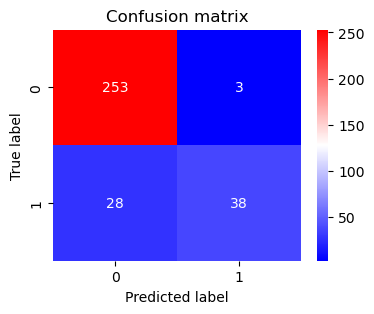

              precision    recall  f1-score   support

       False       0.90      0.99      0.94       256
        True       0.93      0.58      0.71        66

    accuracy                           0.90       322
   macro avg       0.91      0.78      0.83       322
weighted avg       0.91      0.90      0.89       322



In [374]:
cm = confusion_matrix(y_test1, y_pred_test)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='bwr')
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

report = classification_report(y_test1, y_pred_test)
print(report)